[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

- 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
- 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요.
- 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
- 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
- Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용

- 데이터 요약하기
- 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
- 문자열에서 원하는 텍스트 추출하기
- 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
- folium을 통한 위경도 데이터 시각화 이해하기
- folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기

### 데이터셋

- 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
- 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)


## 필요한 라이브러리 불러오기


In [1]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기


In [3]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

# plt.rc("font", family=get_font_family())

In [2]:
plt.rc("font", family="applegothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_98240/799425425.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


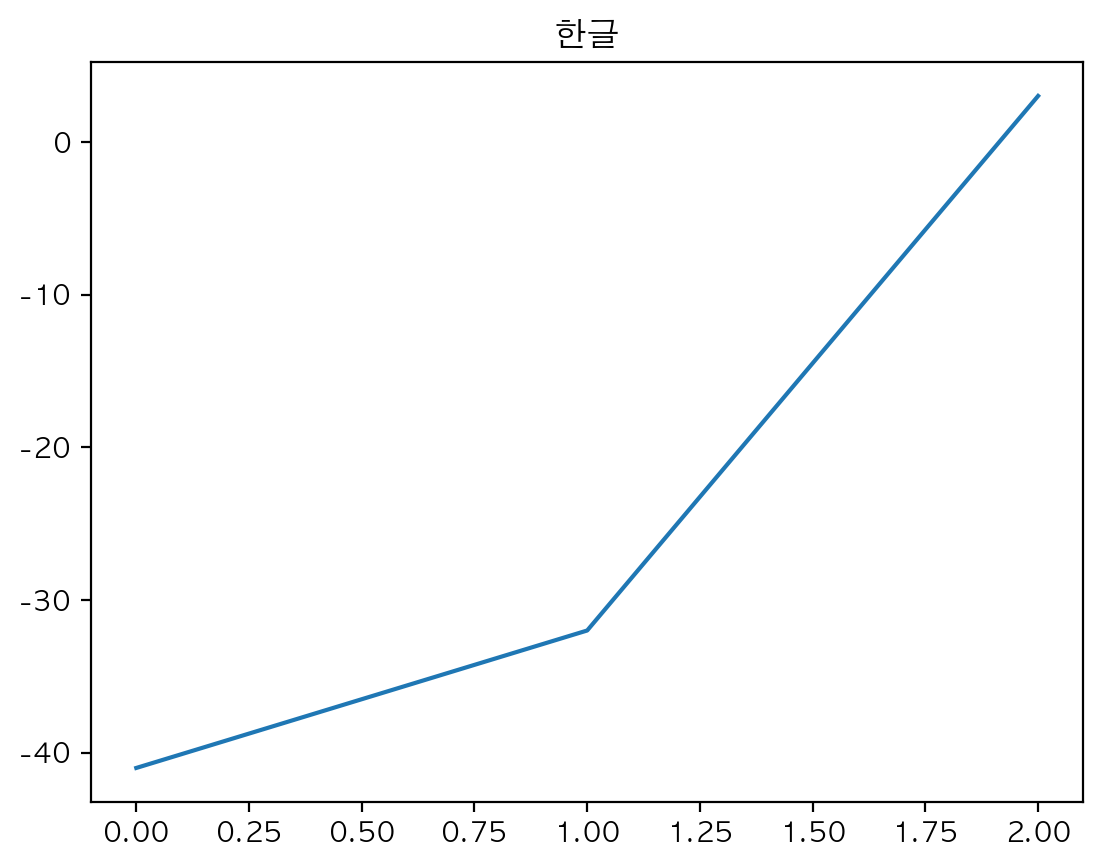

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글")
plt.plot([-41, -32, 3])

## Google Colab 을 위한 코드

### Colab 에서 실행을 위한 코드

- 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
- google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.


In [7]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

### Colab 용 GoogleAuth 인증

- 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.


In [8]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [9]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id})
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')

## 데이터 불러오기

- 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
- 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
- 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)


In [5]:
# 파일을 불러와 df 라는 변수에 담습니다.
df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202406.csv")
df.head()

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_98240/990601446.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202406.csv")


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


### 데이터 크기 보기


In [6]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(460437, 39)

### info 보기


In [7]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   지점명        9092 non-null    object 
 3   상권업종대분류코드  460437 non-null  object 
 4   상권업종대분류명   460437 non-null  object 
 5   상권업종중분류코드  460437 non-null  object 
 6   상권업종중분류명   460437 non-null  object 
 7   상권업종소분류코드  460437 non-null  object 
 8   상권업종소분류명   460437 non-null  object 
 9   표준산업분류코드   460346 non-null  object 
 10  표준산업분류명    460346 non-null  object 
 11  시도코드       460437 non-null  int64  
 12  시도명        460437 non-null  object 
 13  시군구코드      460437 non-null  int64  
 14  시군구명       460437 non-null  object 
 15  행정동코드      460437 non-null  int64  
 16  행정동명       460437 non-null  object 
 17  법정동코드      460437 non-null  int64  
 18  법정동명       460437 non-null  object 
 19  지번코드       460437 non-n

### 결측치 보기


<Axes: >

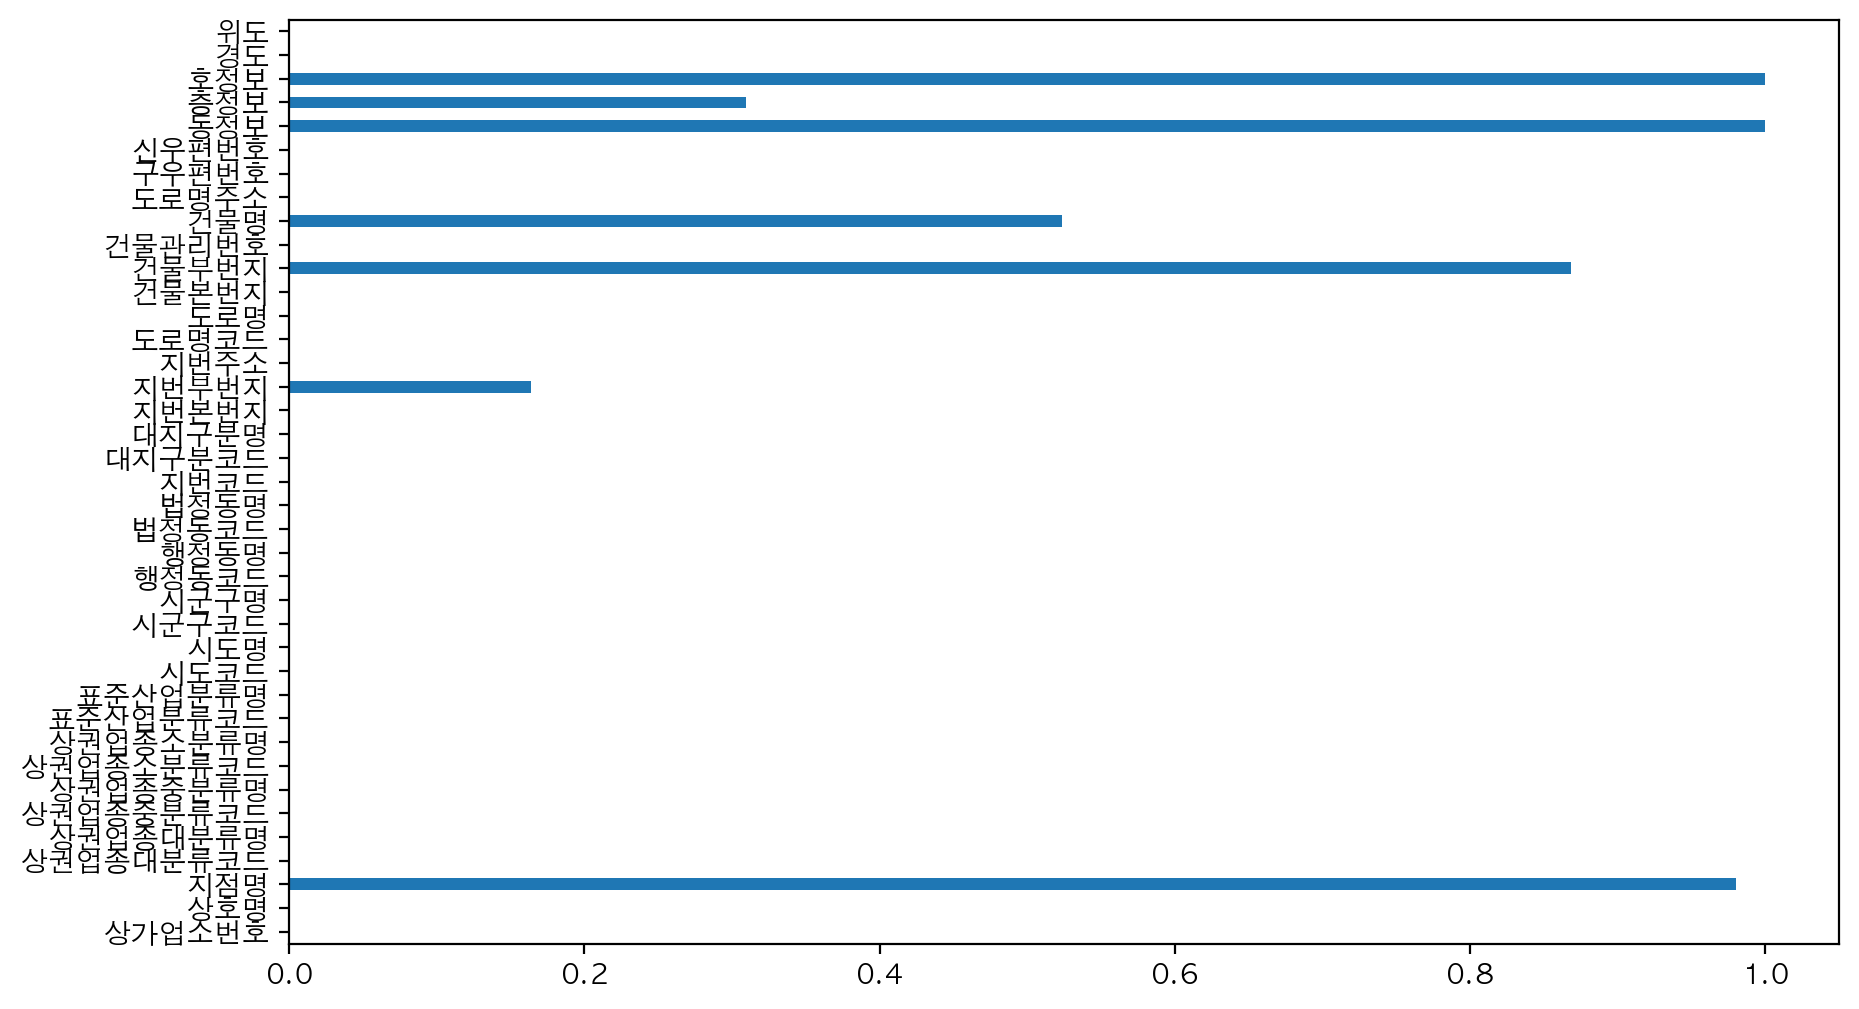

In [13]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df.isnull().mean().plot.barh(figsize=(10, 6))

### 사용하지 않는 컬럼 제거하기


In [14]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = [
    "상호명",
    "상권업종대분류명",
    "상권업종중분류명",
    "상권업종소분류명",
    "시도명",
    "시군구명",
    "행정동명",
    "법정동명",
    "도로명주소",
    "경도",
    "위도",
]
print(df.shape)
df = df[columns].copy()
df.shape

(460437, 39)


(460437, 11)

In [15]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       460437 non-null  object 
 1   상권업종대분류명  460437 non-null  object 
 2   상권업종중분류명  460437 non-null  object 
 3   상권업종소분류명  460437 non-null  object 
 4   시도명       460437 non-null  object 
 5   시군구명      460437 non-null  object 
 6   행정동명      460437 non-null  object 
 7   법정동명      460437 non-null  object 
 8   도로명주소     460437 non-null  object 
 9   경도        460437 non-null  float64
 10  위도        460437 non-null  float64
dtypes: float64(2), object(9)
memory usage: 38.6+ MB


## 색인으로 서브셋 가져오기

### 서울만 따로 보기


In [11]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460432,MA0101202310A0038359,마스터부동산중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1150010500107970001000001,퀸즈파크나인,서울특별시 강서구 공항대로 247,157805,7803,NaN,NaN,NaN,126.834810,37.559341
460433,MA0101202310A0035270,그릿뷰티아카데미학원,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,...,1126010100104720005000033,대도빌딩,서울특별시 중랑구 사가정로 409,131813,2214,NaN,1,NaN,127.090213,37.580598
460434,MA0101202310A0078533,최지원렌탈,NaN,S2,수리·개인,S205,가전제품 수리,S20501,가전제품 수리업,S95310,...,1154510200109660001000001,한양수자인아파트,서울특별시 금천구 시흥대로150길 6,153013,8540,NaN,2,NaN,126.899154,37.475441
460435,MA0101202310A0059884,매직노래연습장,NaN,R1,예술·스포츠,R104,유원지·오락,R10407,노래방,R91223,...,1153010200101390124016658,NaN,서울특별시 구로구 구로중앙로 23,152846,8312,NaN,지,NaN,126.891074,37.492071


In [17]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다.
# 그리고 shape로 갯수를 출력해 봅니다.
df_seoul["시군구명"].unique()

array(['광진구', '중구', '노원구', '양천구', '강서구', '송파구', '구로구', '강남구', '영등포구',
       '금천구', '마포구', '성동구', '중랑구', '서초구', '동작구', '은평구', '동대문구', '서대문구',
       '도봉구', '종로구', '성북구', '강동구', '용산구', '관악구', '강북구'], dtype=object)

In [18]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_seoul["시군구명"].nunique()

25

## 파일로 저장하기

- 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
- 재사용을 위해 파일로 저장합니다.


In [8]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
# df_seoul.to_csv("seoul_open_store.csv", index=False)

In [9]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
# pd.read_csv("seoul_open_store.csv").info()

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기

- 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
- 위에서 pandas의 str.conatains를 활용해 봅니다.
- https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

- 상호명에서 브랜드명을 추출합니다.
- 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
- 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.


In [12]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [13]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]
df[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1892,MA010120220805496302,비알배스킨라빈스한남HIVE,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1117013100100330006006088,멕시코대사관,서울특별시 용산구 독서당로 93,140885,4419,NaN,5,NaN,127.010579,37.535004
4655,MA010120220805735667,비알배스킨라빈스동부이촌점,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1117012900103000301011192,삼익아파트,서울특별시 용산구 이촌로 260,140725,4426,NaN,1,NaN,126.976135,37.518537
8615,MA010120220806196877,배스킨라빈스상계역점,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1135010600105910000010282,대호프라자,서울특별시 노원구 한글비석로 384,139867,1662,NaN,NaN,NaN,127.073221,37.659802
9150,MA010120220806274937,배스킨라빈스길동역점,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1174010500103890002002937,NaN,서울특별시 강동구 양재대로 1471,134880,5353,NaN,1,NaN,127.139247,37.537355
9452,MA010120220806312367,비알배스킨라빈스서울대병원,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1111016600100280021009266,서울대학교병원,서울특별시 종로구 대학로 101,110744,3080,NaN,1,NaN,126.997184,37.580448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450706,MA0101202310A0017428,비알배스킨라빈스WORKSHOP,코리아,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56111,...,1168011800109070054000789,NaN,서울특별시 강남구 논현로 201,135859,6271,NaN,1,NaN,127.040886,37.485894
451137,MA0101202309A0009288,배스킨라빈스영등포,구청점,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56199,...,1156011100103080002029660,NaN,서울특별시 영등포구 당산로 104,150801,7265,NaN,NaN,NaN,126.896396,37.523864
454357,MA0101202309A0035988,배스킨라빈스목동서로점,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56192,...,1147010200104080040020938,NaN,서울특별시 양천구 목동서로 250,158806,8003,NaN,1,NaN,126.869330,37.524960
458256,MA0101202311A0019433,배스킨라빈스용마산역점,NaN,I2,음식,I210,기타 간이,I21008,아이스크림/빙수,I56194,...,1126010100103790039024021,NaN,서울특별시 중랑구 면목로 243,131830,2245,NaN,1,NaN,127.085008,37.574773


In [14]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.
df_seoul[df_seoul["상호명_소문자"].str.contains("던킨|dunkin")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호명_소문자
14713,MA010120220806513543,비알던킨도너츠신림양지병원,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,양지병원,서울특별시 관악구 남부순환로 1640,151852,8779,NaN,1,NaN,126.932878,37.484301,비알던킨도너츠신림양지병원
21172,MA010120220806739697,던킨도너츠동대문,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,동대문종합시장,서울특별시 종로구 종로 266,110784,3198,NaN,5,NaN,127.007311,37.570694,던킨도너츠동대문
22334,MA010120220806792929,던킨도너츠목동남로점,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,현준프라자,서울특별시 구로구 목동남로 6,152831,8218,NaN,NaN,NaN,126.860760,37.506713,던킨도너츠목동남로점
25613,MA010120220806913511,던킨도너츠,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,웰츠타워,서울특별시 광진구 자양로 116,143826,5043,NaN,1,NaN,127.083736,37.538189,던킨도너츠
28728,MA010120220807030118,던킨상도점,NaN,I2,음식,I210,기타 간이,I21003,피자,I56192,...,상도2차두산위브트레지움아파트,서울특별시 동작구 상도로30길 40,156032,6964,NaN,1,NaN,126.942456,37.504310,던킨상도점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423930,MA0101202306A0063233,던킨홍대역점,NaN,I2,음식,I210,기타 간이,I21003,피자,I56192,...,파라다이스텔,서울특별시 마포구 양화로 157,121898,3995,NaN,1,NaN,126.922928,37.556682,던킨홍대역점
432645,MA0101202306A0096092,던킨,가든파이브점,I2,음식,I210,기타 간이,I21003,피자,I56192,...,가든파이브라이프,서울특별시 송파구 충민로 66,138960,5838,NaN,1,NaN,127.124941,37.477608,던킨
435979,MA0101202307A0104018,던킨양재하나로점,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,농협하나로클럽,서울특별시 서초구 청계산로 10,137916,6797,NaN,1,NaN,127.043516,37.463218,던킨양재하나로점
438894,MA0101202308A0076599,던킨송파,방이점,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,NaN,서울특별시 송파구 마천로7길 5,138855,5657,NaN,1,NaN,127.127735,37.508589,던킨송파


In [15]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31 = df_seoul[
    df_seoul["상호명_소문자"].str.contains(
        "배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin"
    )
].copy()
df_31.shape

(385, 40)

In [16]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.
df_31.loc[
    df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),
    "브랜드명",
] = "배스킨라빈스"

df_31[["상호명", "브랜드명"]]

,상호명,브랜드명
1892,비알배스킨라빈스한남HIVE,배스킨라빈스
4655,비알배스킨라빈스동부이촌점,배스킨라빈스
8615,배스킨라빈스상계역점,배스킨라빈스
9150,배스킨라빈스길동역점,배스킨라빈스
9452,비알배스킨라빈스서울대병원,배스킨라빈스
...,...,...
451137,배스킨라빈스영등포,배스킨라빈스
454357,배스킨라빈스목동서로점,배스킨라빈스
458256,배스킨라빈스용마산역점,배스킨라빈스
458901,배스킨라빈스학동역점,배스킨라빈스


In [25]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),
#           "브랜드명"]
# df_31.loc[~df_31['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명']
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

1892      배스킨라빈스
4655      배스킨라빈스
8615      배스킨라빈스
9150      배스킨라빈스
9452      배스킨라빈스
           ...  
451137    배스킨라빈스
454357    배스킨라빈스
458256    배스킨라빈스
458901    배스킨라빈스
459105     던킨도너츠
Name: 브랜드명, Length: 382, dtype: object

In [17]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.
df_31["상권업종대분류명"].value_counts()

상권업종대분류명
음식    382
소매      2
숙박      1
Name: count, dtype: int64

In [18]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.
df_31[df_31["상권업종대분류명"].isin(["소매", "숙박"])]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호명_소문자,브랜드명
53078,MA010120220808457658,던킨금천,NaN,G2,소매,G208,가전·통신 소매,G20802,핸드폰 소매업,G47312,...,서울특별시 금천구 독산로 203,153832,8618,NaN,1,NaN,126.902280,37.465009,던킨금천,NaN
404194,MA0106202301A0580448,와이씨앤티_던킨,NaN,I1,숙박,I101,일반 숙박,I10101,호텔/리조트,I55101,...,서울특별시 구로구 디지털로32길 72,152880,8393,NaN,NaN,NaN,126.898837,37.483178,와이씨앤티_던킨,NaN
405168,MA0106202301A0008793,한국방송통신대학교소비자생활협동조합던킨,NaN,G2,소매,G204,종합 소매,G20499,그 외 기타 종합 소매업,G47190,...,서울특별시 종로구 대학로 86,110810,3087,NaN,NaN,NaN,127.003269,37.579184,한국방송통신대학교소비자생활협동조합던킨,NaN


In [19]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "숙박"])].copy()
df_31.shape

(382, 41)

### 범주형 값으로 countplot 그리기


In [20]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31["브랜드명"].value_counts()

<Axes: ylabel='브랜드명'>

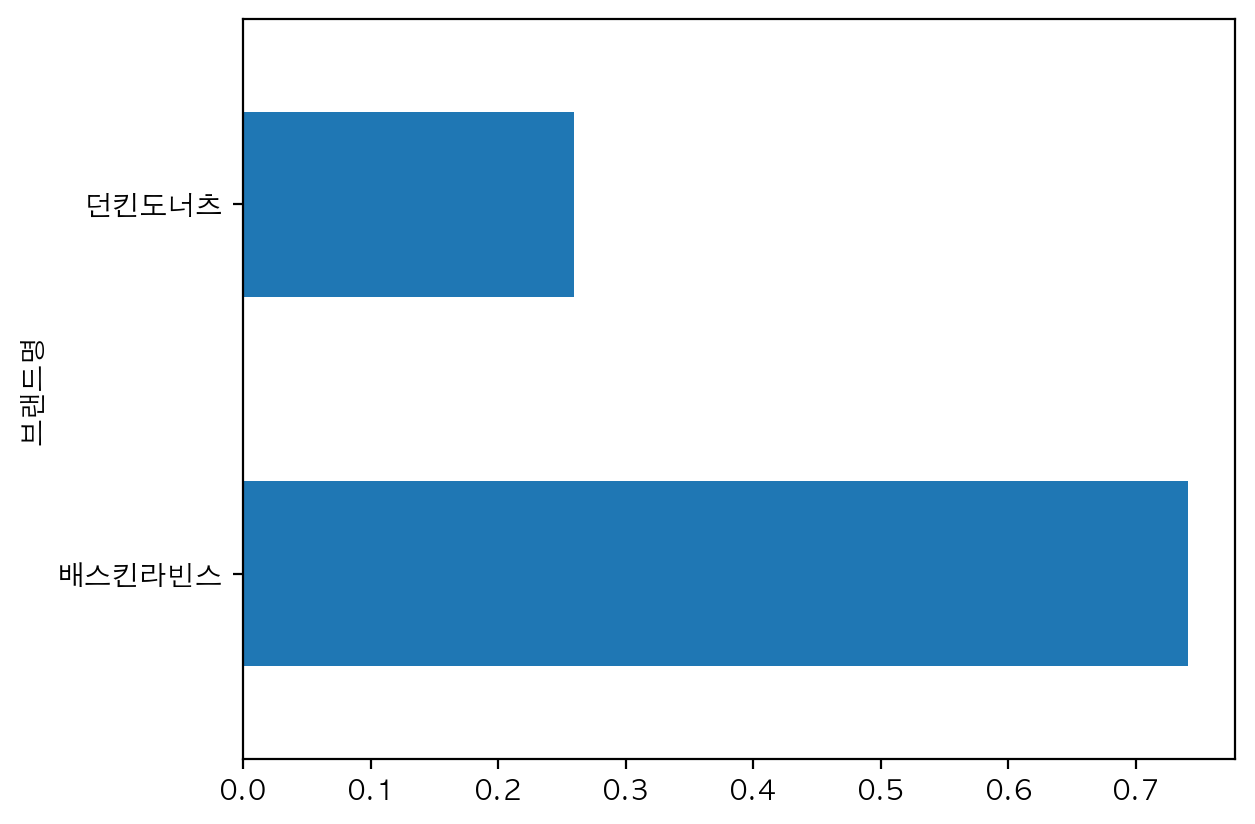

In [26]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

In [22]:
brand_count.index

Index(['배스킨라빈스'], dtype='object', name='브랜드명')

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_98240/3179329981.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g.text(x=i, y=brand_count[i], s=brand_count[i])


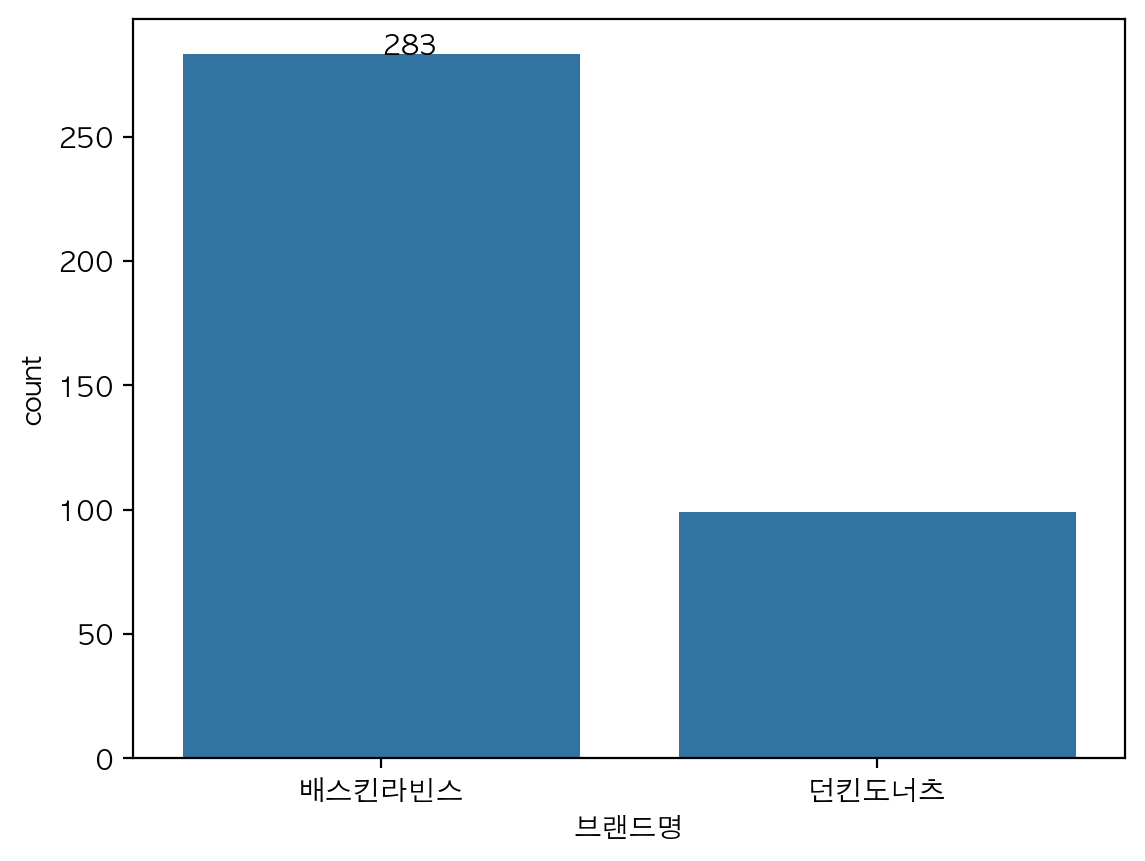

In [27]:
# countplot 을 그립니다.
g = sns.countplot(data=df_31, x="브랜드명")

for i, v in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

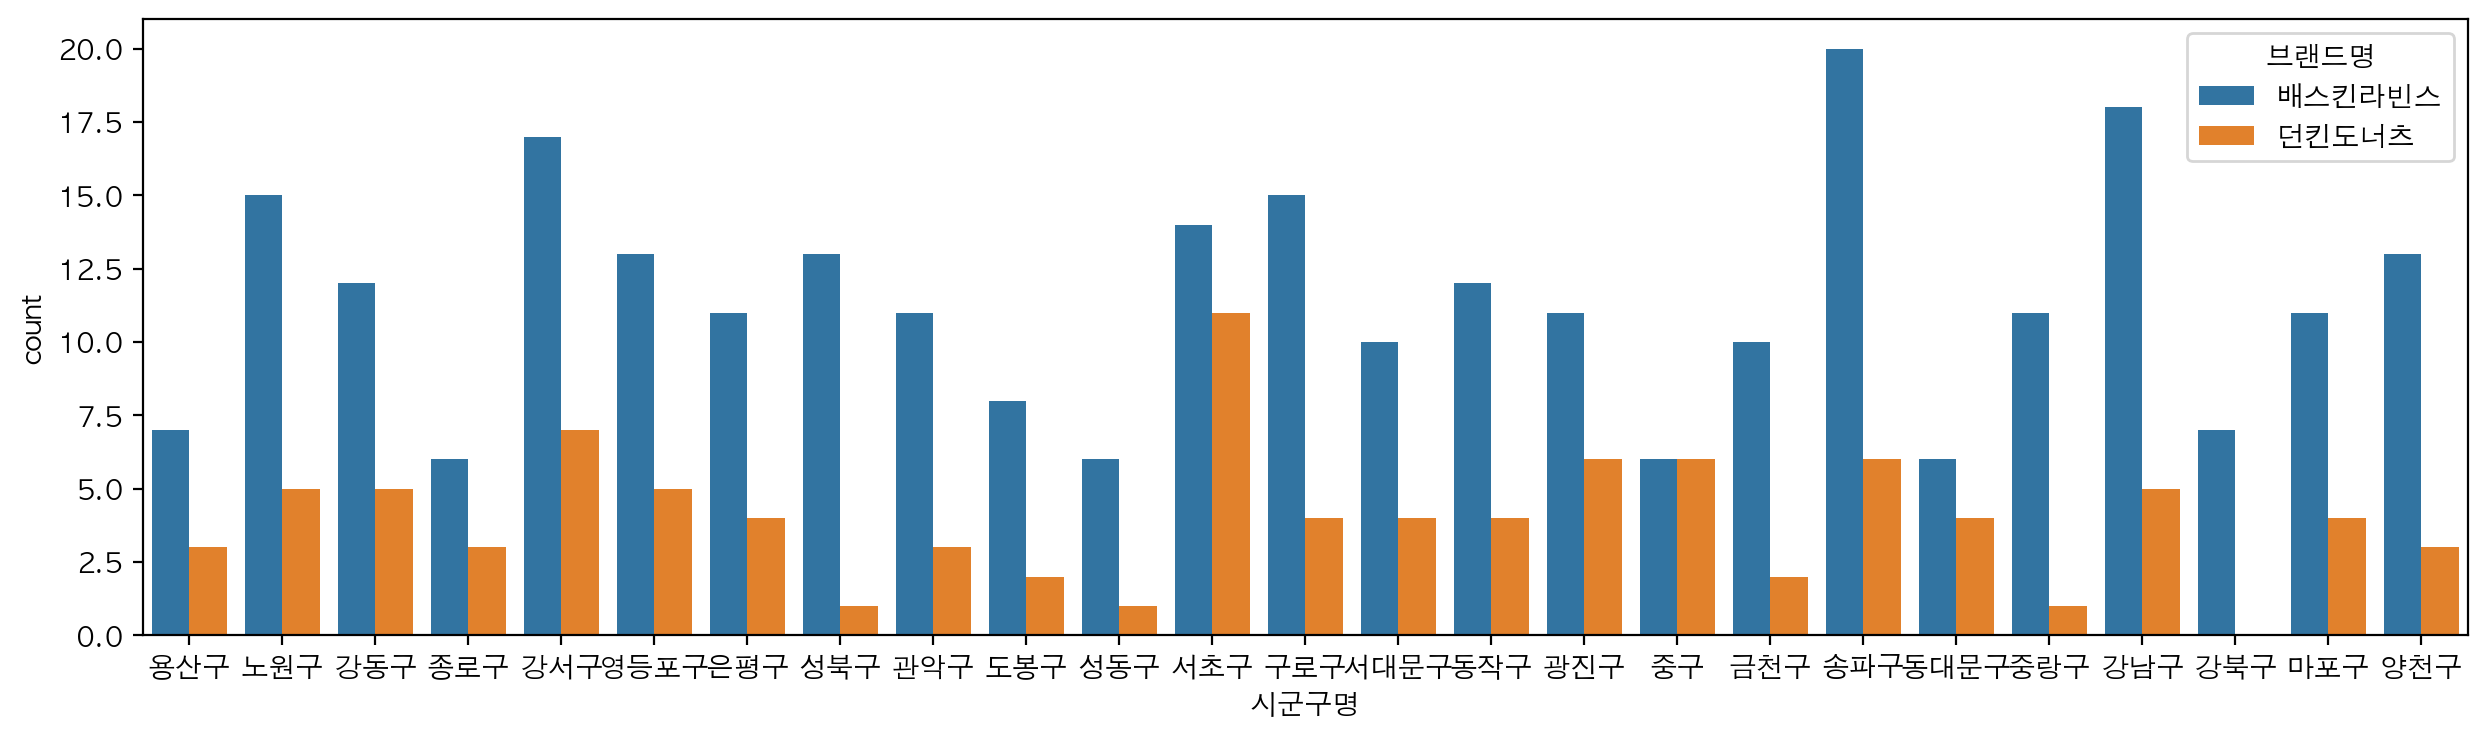

In [28]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기


- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot


<Axes: xlabel='경도', ylabel='위도'>

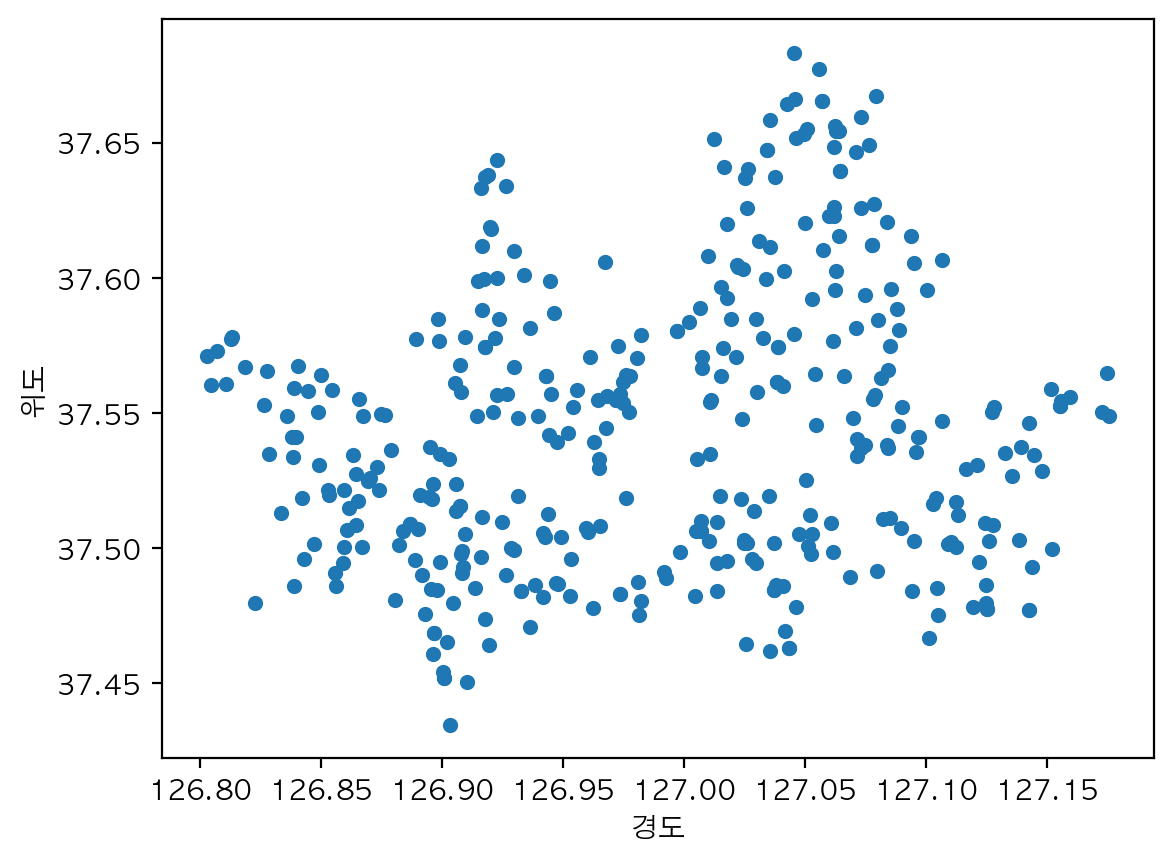

In [29]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<Axes: xlabel='경도', ylabel='위도'>

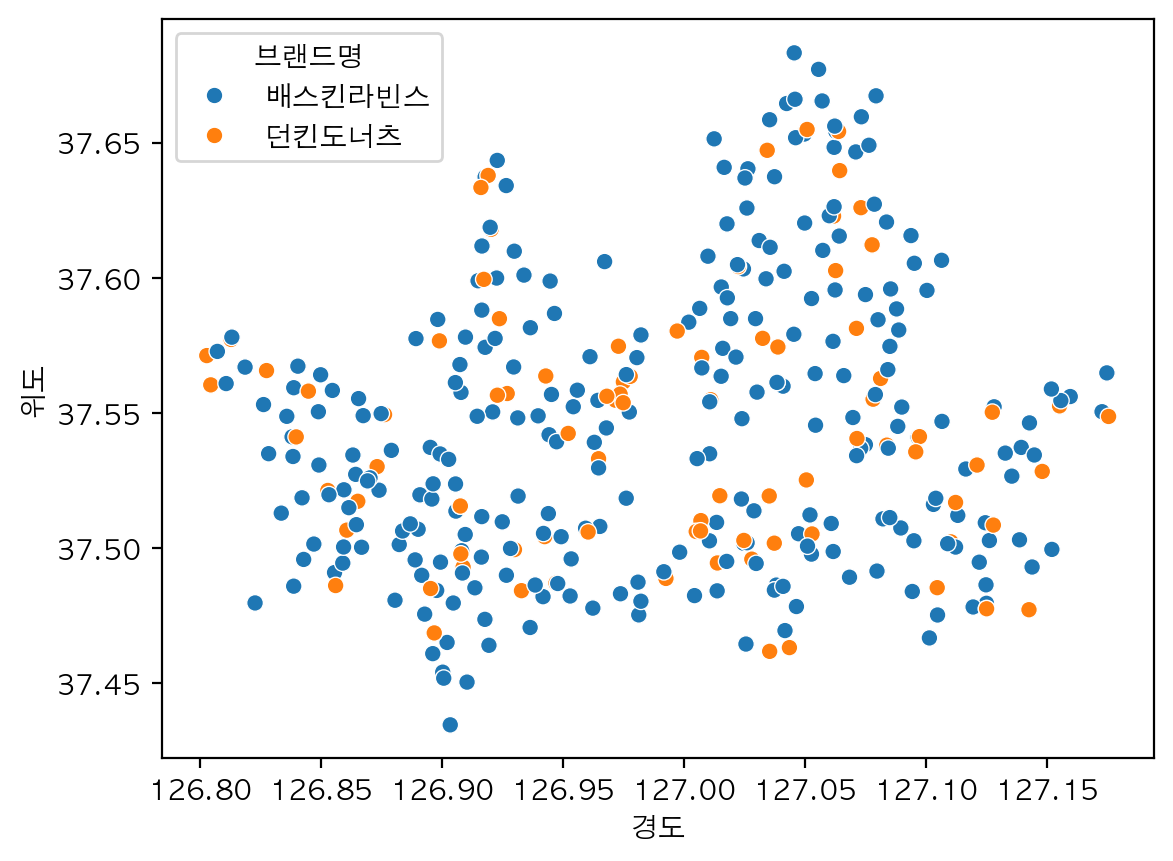

In [30]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

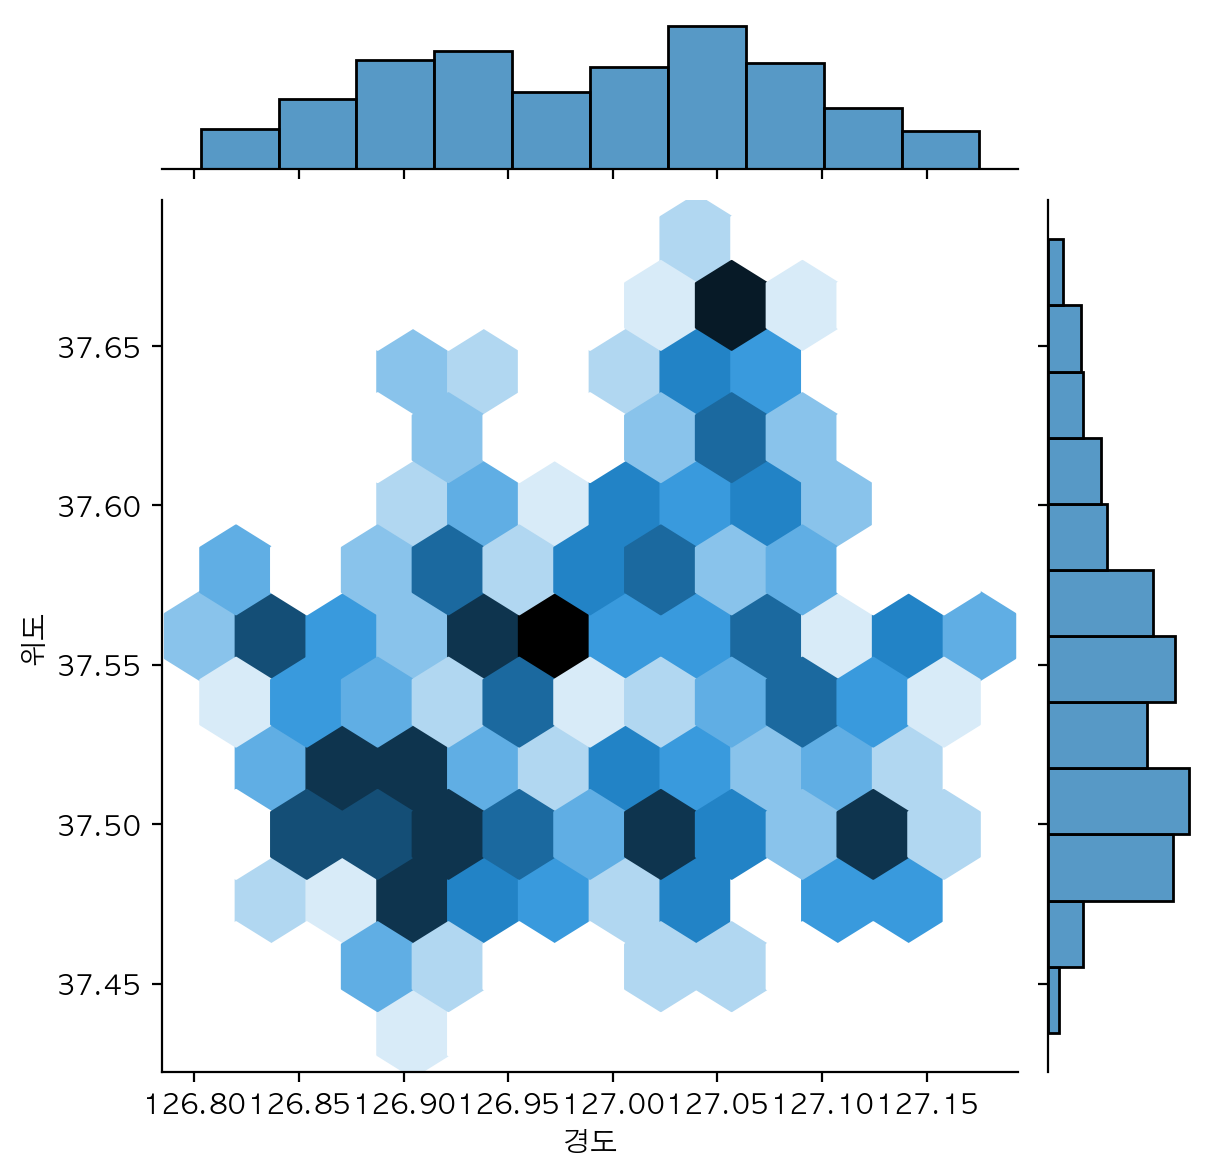

In [31]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

## Folium 으로 지도 활용하기

- 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
  <img src="https://i.imgur.com/x7pzfCP.jpg">
- <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.

- 윈도우
  - <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
- 맥

  - terminal 프로그램을 열어 설치해 주세요.

- 다음의 문서를 활용해서 지도를 표현합니다.
- https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb
- Folium 사용예제 :
  http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [35]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리
import folium

In [32]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
lat = df_31["위도"].mean()
long = df_31["경도"].mean()

In [41]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.
map = folium.Map(location=[lat, long])

print(df_31.sample(1))

folium.Marker(
    [126.947119, 37.487114], popup="<i>던킨도너츠", tooltip="던킨도너츠"
).add_to(map)

map

                      상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
340010  MA010120220804112154  베스킨라빈스  NaN        I2       음식      I210   

       상권업종중분류명 상권업종소분류코드  상권업종소분류명 표준산업분류코드  ...              도로명주소   구우편번호  \
340010    기타 간이    I21008  아이스크림/빙수   I56194  ...  서울특별시 강동구 상암로 183  134861   

       신우편번호  동정보  층정보  호정보         경도         위도 상호명_소문자    브랜드명  
340010  5307  NaN  NaN  NaN  127.14264  37.546435  베스킨라빈스  배스킨라빈스  

[1 rows x 41 columns]


In [42]:
# folium 사용법을 보고 일부 데이터 보기
df_31.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호명_소문자,브랜드명
348624,MA010120220804255897,던킨도너츠,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,서울특별시 송파구 올림픽로 378,138827,5544,NaN,1,NaN,127.112129,37.51697,던킨도너츠,던킨도너츠


ddawda


In [ ]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포

- 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.


In [44]:
# 데이터프레임의 인덱스만 출력합니다.
df_31.index

TypeError: 'Index' object is not callable

### 기본 마커로 표현하기


In [66]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:

    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]

    icon_color = "blue" if df_31.loc[i, "브랜드명"] == "던킨도너츠" else "red"

    folium.Marker(
        location=[sub_lat, sub_long],
        popup=f"<i>{title}</i>",
        tooltip=title,
        icon=folium.Icon(color=icon_color),
    ).add_to(m)

m

### MarkerCluster 로 표현하기

- https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb


In [67]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)

marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:

    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]

    icon_color = "blue" if df_31.loc[i, "브랜드명"] == "던킨도너츠" else "red"

    folium.Marker(
        location=[sub_lat, sub_long],
        popup=f"<i>{title}</i>",
        tooltip=title,
        icon=folium.Icon(color=icon_color),
    ).add_to(marker_cluster)

m

## 파리바게뜨와 뚜레주르 분석하기


### 데이터 색인으로 가져오기


In [ ]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.

### 가져온 데이터가 맞는지 확인하기


In [ ]:
# 잘못 가져온 데이터가 있는지 확인합니다.

In [ ]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.

In [ ]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.

In [ ]:
# 상호명의 unique 값을 봅니다.

In [ ]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.

In [ ]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
# 파리크라상에 대한 처리를 따로 해주세요!
df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"

NameError: name 'df_bread' is not defined

In [ ]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.

### 범주형 변수 빈도수 계산하기


In [ ]:
# 브랜드명의 빈도수를 봅니다.

In [ ]:
# countplot 으로 브랜드명을 그려봅니다.

In [ ]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.

In [ ]:
# scatterplot 으로 위경도를 표현해 봅니다.

In [ ]:
# jointplot 으로 위경도를 표현해 봅니다.

## 지도에 표현하기

### Marker 로 위치를 찍어보기


In [ ]:
# for i in df_bread.index:
#     print(i)

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

### MarkerCluster 로 표현하기

- https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb


### Heatmap 으로 그리기

https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb


In [ ]:
# heatmap 예제 이해하기

In [ ]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기

In [ ]:
# HeatMap 그리기